<a href="https://colab.research.google.com/github/EddyGiusepe/Dropout_Regularization_In_Deep_Neural_Network/blob/main/Dropout_Regularization_in_Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>Dropout Regularization In Deep Neural Network</h2>

Informações do conjunto de dados:

O arquivo "sonar.mines" contém $111$ padrões obtidos através da projeção de sinais de sonar de um cilindro de metal em vários ângulos e sob várias condições. O arquivo "sonar.rocks" contém $97$ padrões obtidos de rochas em condições semelhantes. O sinal de sonar transmitido é um chiado de frequência modulada, aumentando em frequência. O conjunto de dados contém sinais obtidos de uma variedade de ângulos de aspecto diferentes, abrangendo $90$ graus para o cilindro e $180$ graus para a rocha. 


Cada padrão é um conjunto de $60$ números no intervalo de $0.0$ a $1.0$. **Cada número representa a energia dentro de uma determinada banda de frequência, integrada ao longo (over) de um determinado período de tempo**. A abertura de integração para frequências mais altas ocorre mais tarde, uma vez que essas frequências são transmitidas mais tarde durante o chiado (chirp).


O rótulo associado a cada registro contém a letra ``R`` se o objeto for uma rocha e ``M`` se for uma mina (cilindro de metal). Os números nas etiquetas estão em ordem crescente de ângulo de aspecto, mas não codificam o ângulo diretamente.


O Dataset pode ser encontrado [aqui](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)).


Uma explicação em vídeo [pode ser assistido aqui](https://www.youtube.com/watch?v=lcI8ukTUEbo&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=20).

## Importamos nossas livrarias (nossas bibliotecas)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import confusion_matrix , classification_report



In [2]:
import warnings 
warnings.filterwarnings('ignore')


## Importamos nossos Dados 

In [3]:
# Usei o cabeçalho é igual a nenhum (None) porque este arquivo não tem nenhum header você vê 
# que ele não tem um nome de coluna e quando você especifica header is none ele vai apenas 
# usar apenas a sequência inteira como nomes de coluna

df = pd.read_csv("/content/drive/MyDrive/Apenas_TensorFlow_Eddy/codebasics_YouTube_Tensorflow_keras_PYTHON/deep-learning-keras-tf-tutorial/13_dropout_layer/sonar_dataset.csv", header=None)


In [4]:
# Poder usar também o método:  .head()

df.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
70,0.0065,0.0122,0.0068,0.0108,0.0217,0.0284,0.0527,0.0575,0.1054,0.1109,0.0937,0.0827,0.0920,0.0911,0.1487,0.1666,0.1268,0.1374,0.1095,0.1286,0.2146,0.2889,0.4238,0.6168,0.8167,0.9622,0.8280,0.5816,0.4667,0.3539,0.2727,0.1410,0.1863,0.2176,0.2360,0.1725,0.0589,0.0621,0.1847,0.2452,0.2984,0.3041,0.2275,0.1480,0.1102,0.1178,0.0608,0.0333,0.0276,0.0100,0.0023,0.0069,0.0025,0.0027,0.0052,0.0036,0.0026,0.0036,0.0006,0.0035,R
140,0.0412,0.1135,0.0518,0.0232,0.0646,0.1124,0.1787,0.2407,0.2682,0.2058,0.1546,0.2671,0.3141,0.2904,0.3531,0.5079,0.4639,0.1859,0.4474,0.4079,0.5400,0.4786,0.4332,0.6113,0.5091,0.4606,0.7243,0.8987,0.8826,0.9201,0.8005,0.6033,0.2120,0.2866,0.4033,0.2803,0.3087,0.3550,0.2545,0.1432,0.5869,0.6431,0.5826,0.4286,0.4894,0.5777,0.4315,0.2640,0.1794,0.0772,0.0798,0.0376,0.0143,0.0272,0.0127,0.0166,0.0095,0.0225,0.0098,0.0085,M
61,0.0135,0.0045,0.0051,0.0289,0.0561,0.0929,0.1031,0.0883,0.1596,0.1908,0.1576,0.1112,0.1197,0.1174,0.1415,0.2215,0.2658,0.2713,0.3862,0.5717,0.6797,0.8747,1.0000,0.8948,0.8420,0.9174,0.9307,0.9050,0.8228,0.6986,0.5831,0.4924,0.4563,0.5159,0.5670,0.5284,0.5144,0.3742,0.2282,0.1193,0.1088,0.0431,0.1070,0.0583,0.0046,0.0473,0.0408,0.0290,0.0192,0.0094,0.0025,0.0037,0.0084,0.0102,0.0096,0.0024,0.0037,0.0028,0.0030,0.0030,R
173,0.0329,0.0216,0.0386,0.0627,0.1158,0.1482,0.2054,0.1605,0.2532,0.2672,0.3056,0.3161,0.2314,0.2067,0.1804,0.2808,0.4423,0.5947,0.6601,0.5844,0.4539,0.4789,0.5646,0.5281,0.7115,1.0000,0.9564,0.6090,0.5112,0.4000,0.0482,0.1852,0.2186,0.1436,0.1757,0.1428,0.1644,0.3089,0.3648,0.4441,0.3859,0.2813,0.1238,0.0953,0.1201,0.0825,0.0618,0.0141,0.0108,0.0124,0.0104,0.0095,0.0151,0.0059,0.0015,0.0053,0.0016,0.0042,0.0053,0.0074,M
55,0.0201,0.0116,0.0123,0.0245,0.0547,0.0208,0.0891,0.0836,0.1335,0.1199,0.1742,0.1387,0.2042,0.2580,0.2616,0.2097,0.2532,0.3213,0.4327,0.4760,0.5328,0.6057,0.6696,0.7476,0.8930,0.9405,1.0000,0.9785,0.8473,0.7639,0.6701,0.4989,0.3718,0.2196,0.1416,0.2680,0.2630,0.3104,0.3392,0.2123,0.1170,0.2655,0.2203,0.1541,0.1464,0.1044,0.1225,0.0745,0.0490,0.0224,0.0032,0.0076,0.0045,0.0056,0.0075,0.0037,0.0045,0.0029,0.0008,0.0018,R


In [5]:
df.shape

(208, 61)

In [6]:
# verificamos se temos valores "nan"

df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [7]:
# Nomes das colunas
# Nossa target é a coluna número 60
df.columns


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [8]:
# Aqui vemos que nossas etiquetas não estão enviesadas (ou desbalançeadas)
# Vemos isso na coluna número 60

df[60].value_counts()


M    111
R     97
Name: 60, dtype: int64

In [9]:
# Criamos nosso "x" e "y"

x = df.drop(60, axis=1)
y = df[60]


In [10]:
# verificamos nossa target

y.sample(6)

33     R
17     R
27     R
190    M
107    M
55     R
Name: 60, dtype: object

In [11]:
# Agora vamos a converter nosso target em valores inteiros ("0" ou "1")
# Ou seja: R --> 1 e M -->0
# pandas.get_dummies --> Converta variáveis ​​categóricas em variáveis ​​dummy/indicadoras.

y = pd.get_dummies(y, drop_first=True)
y.sample(6)


,R
86,1
27,1
141,0
173,0
97,0
182,0


In [12]:
# Vejamos novamente nosso target

y.value_counts()

R
0    111
1     97
dtype: int64

In [13]:
x.sample(6)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
153,0.0233,0.0394,0.0416,0.0547,0.0993,0.1515,0.1674,0.1513,0.1723,0.2078,0.1239,0.0236,0.1771,0.3115,0.4990,0.6707,0.7655,0.8485,0.9805,1.0000,1.0000,0.9992,0.9067,0.6803,0.5103,0.4716,0.4980,0.6196,0.7171,0.6316,0.3554,0.2897,0.4316,0.3791,0.2421,0.0944,0.0351,0.0844,0.0436,0.1130,0.2045,0.1937,0.0834,0.1502,0.1675,0.1058,0.1111,0.0849,0.0596,0.0201,0.0071,0.0104,0.0062,0.0026,0.0025,0.0061,0.0038,0.0101,0.0078,0.0006
182,0.0095,0.0308,0.0539,0.0411,0.0613,0.1039,0.1016,0.1394,0.2592,0.3745,0.4229,0.4499,0.5404,0.4303,0.3333,0.3496,0.3426,0.2851,0.4062,0.6833,0.7650,0.6670,0.5703,0.5995,0.6484,0.8614,0.9819,0.9380,0.8435,0.6074,0.5403,0.6890,0.5977,0.3244,0.0516,0.3157,0.3590,0.3881,0.5716,0.4314,0.3051,0.4393,0.4302,0.4831,0.5084,0.1952,0.1539,0.2037,0.1054,0.0251,0.0357,0.0181,0.0019,0.0102,0.0133,0.0040,0.0042,0.0030,0.0031,0.0033
100,0.0629,0.1065,0.1526,0.1229,0.1437,0.1190,0.0884,0.0907,0.2107,0.3597,0.5466,0.5205,0.5127,0.5395,0.6558,0.8705,0.9786,0.9335,0.7917,0.7383,0.6908,0.3850,0.0671,0.0502,0.2717,0.2839,0.2234,0.1911,0.0408,0.2531,0.1979,0.1891,0.2433,0.1956,0.2667,0.1340,0.1073,0.2023,0.1794,0.0227,0.1313,0.1775,0.1549,0.1626,0.0708,0.0129,0.0795,0.0762,0.0117,0.0061,0.0257,0.0089,0.0262,0.0108,0.0138,0.0187,0.0230,0.0057,0.0113,0.0131
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
112,0.0454,0.0472,0.0697,0.1021,0.1397,0.1493,0.1487,0.0771,0.1171,0.1675,0.2799,0.3323,0.4012,0.4296,0.5350,0.5411,0.6870,0.8045,0.9194,0.9169,1.0000,0.9972,0.9093,0.7918,0.6705,0.5324,0.3572,0.2484,0.3161,0.3775,0.3138,0.1713,0.2937,0.5234,0.5926,0.5437,0.4516,0.3379,0.3215,0.2178,0.1674,0.2634,0.2980,0.2037,0.1155,0.0919,0.0882,0.0228,0.0380,0.0142,0.0137,0.0120,0.0042,0.0238,0.0129,0.0084,0.0218,0.0321,0.0154,0.0053
122,0.0249,0.0119,0.0277,0.0760,0.1218,0.1538,0.1192,0.1229,0.2119,0.2531,0.2855,0.2961,0.3341,0.4287,0.5205,0.6087,0.7236,0.7577,0.7726,0.8098,0.8995,0.9247,0.9365,0.9853,0.9776,1.0000,0.9896,0.9076,0.7306,0.5758,0.4469,0.3719,0.2079,0.0955,0.0488,0.1406,0.2554,0.2054,0.1614,0.2232,0.1773,0.2293,0.2521,0.1464,0.0673,0.0965,0.1492,0.1128,0.0463,0.0193,0.0140,0.0027,0.0068,0.0150,0.0012,0.0133,0.0048,0.0244,0.0077,0.0074


## Dividimos nosso Dataset em Dados de treino e teste

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [15]:
# Vejamos nosso x_train

x_train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
67,0.0368,0.0403,0.0317,0.0293,0.0820,0.1342,0.1161,0.0663,0.0155,0.0506,0.0906,0.2545,0.1464,0.1272,0.1223,0.1669,0.1424,0.1285,0.1857,0.1136,0.2069,0.0219,0.2400,0.2547,0.0240,0.1923,0.4753,0.7003,0.6825,0.6443,0.7063,0.5373,0.6601,0.8708,0.9518,0.9605,0.7712,0.6772,0.6431,0.6720,0.6035,0.5155,0.3802,0.2278,0.1522,0.0801,0.0804,0.0752,0.0566,0.0175,0.0058,0.0091,0.0160,0.0160,0.0081,0.0070,0.0135,0.0067,0.0078,0.0068
14,0.0124,0.0433,0.0604,0.0449,0.0597,0.0355,0.0531,0.0343,0.1052,0.2120,0.1640,0.1901,0.3026,0.2019,0.0592,0.2390,0.3657,0.3809,0.5929,0.6299,0.5801,0.4574,0.4449,0.3691,0.6446,0.8940,0.8978,0.4980,0.3333,0.2350,0.1553,0.3666,0.4340,0.3082,0.3024,0.4109,0.5501,0.4129,0.5499,0.5018,0.3132,0.2802,0.2351,0.2298,0.1155,0.0724,0.0621,0.0318,0.0450,0.0167,0.0078,0.0083,0.0057,0.0174,0.0188,0.0054,0.0114,0.0196,0.0147,0.0062
164,0.0163,0.0198,0.0202,0.0386,0.0752,0.1444,0.1487,0.1484,0.2442,0.2822,0.3691,0.3750,0.3927,0.3308,0.1085,0.1139,0.3446,0.5441,0.6470,0.7276,0.7894,0.8264,0.8697,0.7836,0.7140,0.5698,0.2908,0.4636,0.6409,0.7405,0.8069,0.8420,1.0000,0.9536,0.6755,0.3905,0.1249,0.3629,0.6356,0.8116,0.7664,0.5417,0.2614,0.1723,0.2814,0.2764,0.1985,0.1502,0.1219,0.0493,0.0027,0.0077,0.0026,0.0031,0.0083,0.0020,0.0084,0.0108,0.0083,0.0033
179,0.0394,0.0420,0.0446,0.0551,0.0597,0.1416,0.0956,0.0802,0.1618,0.2558,0.3078,0.3404,0.3400,0.3951,0.3352,0.2252,0.2086,0.2248,0.3382,0.4578,0.6474,0.6708,0.7007,0.7619,0.7745,0.6767,0.7373,0.7834,0.9619,1.0000,0.8086,0.5558,0.5409,0.4988,0.3108,0.2897,0.2244,0.0960,0.2287,0.3228,0.3454,0.3882,0.3240,0.0926,0.1173,0.0566,0.0766,0.0969,0.0588,0.0050,0.0118,0.0146,0.0040,0.0114,0.0032,0.0062,0.0101,0.0068,0.0053,0.0087
19,0.0126,0.0149,0.0641,0.1732,0.2565,0.2559,0.2947,0.4110,0.4983,0.5920,0.5832,0.5419,0.5472,0.5314,0.4981,0.6985,0.8292,0.7839,0.8215,0.9363,1.0000,0.9224,0.7839,0.5470,0.4562,0.5922,0.5448,0.3971,0.0882,0.2385,0.2005,0.0587,0.2544,0.2009,0.0329,0.1547,0.1212,0.2446,0.3171,0.3195,0.3051,0.0836,0.1266,0.1381,0.1136,0.0516,0.0073,0.0278,0.0372,0.0121,0.0153,0.0092,0.0035,0.0098,0.0121,0.0006,0.0181,0.0094,0.0116,0.0063


# Agora vamos a usar Deep Learning

## Modelo sem camada de exclusão (Model without Dropout Layer)

In [16]:
# Criamos nossa Red Neuronal

model = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100,
                    batch_size=8, verbose=0)



In [17]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 1.0740 - accuracy: 0.7308


[1.073990821838379, 0.7307692170143127]

Training Accuracy >>> Test Accuracy

In [18]:
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)

2/2 [==============================] - 0s 5ms/step - loss: 1.0740 - accuracy: 0.7308


In [19]:
print('Train: %.3f, Test: %.3f'% (train_acc, test_acc))

Train: 1.000, Test: 0.731


In [20]:
y_pred = model.predict(x_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

[4.2193204e-08 9.9682933e-01 7.5165677e-01 8.7632434e-06 9.9999976e-01
 9.9994147e-01 1.0780902e-01 9.9999821e-01 2.8039780e-05 9.9999988e-01]
[0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]


In [21]:
# Comparamos com nosso Dados
y_test[:10]


,R
186,0
155,0
165,0
200,0
58,1
34,1
151,0
18,1
202,0
62,1


In [22]:
print("A nossa matriz de confusão é: ")
print(confusion_matrix(y_test, y_pred))

A nossa matriz de confusão é: 
[[23  4]
 [10 15]]


In [23]:
print("Nosso relatório de classificação é: ")
print(classification_report(y_test, y_pred))


Nosso relatório de classificação é: 
              precision    recall  f1-score   support

           0       0.70      0.85      0.77        27
           1       0.79      0.60      0.68        25

    accuracy                           0.73        52
   macro avg       0.74      0.73      0.72        52
weighted avg       0.74      0.73      0.73        52



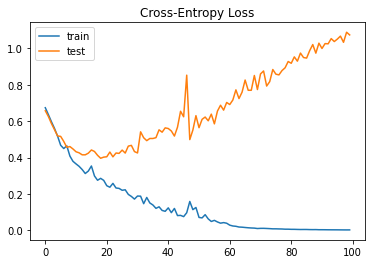

In [24]:
# plot loss learning curves

plt.title('Cross-Entropy Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

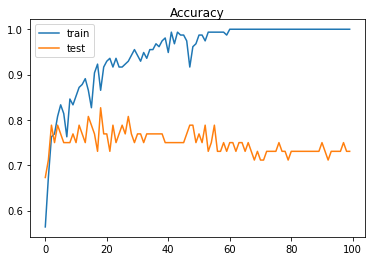

In [25]:
# plot accuracy learning curves

plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()


## Modelo com camada de exclusão (Model with Dropout Layer)

In [26]:
modeld = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dropout(0.70),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.70),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.70),
    keras.layers.Dense(1, activation='sigmoid')
])

modeld.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

historyd = modeld.fit(x_train, y_train, validation_data=(x_test, y_test),
                      epochs=100, batch_size=8, verbose=0)

In [27]:
_, traind_acc = modeld.evaluate(x_train, y_train, verbose=1)
_, testd_acc = modeld.evaluate(x_test, y_test, verbose=1)

2/2 [==============================] - 0s 5ms/step - loss: 0.6054 - accuracy: 0.7308


A precisão do treinamento ainda é boa, mas a precisão do teste melhorou (Training Accuracy is still good but Test Accuracy Improved).

In [28]:
print('Train: %.3f, Test: %.3f' % (traind_acc, testd_acc))

Train: 0.750, Test: 0.731


In [29]:
y_pred = modeld.predict(x_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

[0.3481594  0.43594912 0.54886425 0.38892296 0.6687202  0.5381419
 0.41380066 0.66654545 0.38131854 0.71738565]
[0. 0. 1. 0. 1. 1. 0. 1. 0. 1.]


In [30]:
# Comparamos com nosso Dados
y_test[:10]


,R
186,0
155,0
165,0
200,0
58,1
34,1
151,0
18,1
202,0
62,1


In [31]:
print("A nossa matriz de confusão é: ")
print(confusion_matrix(y_test, y_pred))

A nossa matriz de confusão é: 
[[26  1]
 [13 12]]


In [32]:
print("Nosso relatório de classificação é: ")
print(classification_report(y_test, y_pred))


Nosso relatório de classificação é: 
              precision    recall  f1-score   support

           0       0.67      0.96      0.79        27
           1       0.92      0.48      0.63        25

    accuracy                           0.73        52
   macro avg       0.79      0.72      0.71        52
weighted avg       0.79      0.73      0.71        52



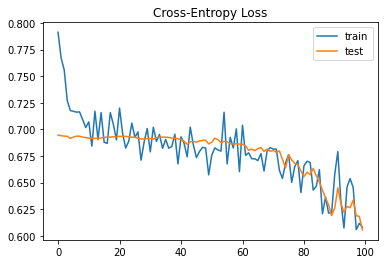

In [33]:
# plot loss learning curves

plt.title('Cross-Entropy Loss')
plt.plot(historyd.history['loss'], label='train')
plt.plot(historyd.history['val_loss'], label='test')
plt.legend()
plt.show()

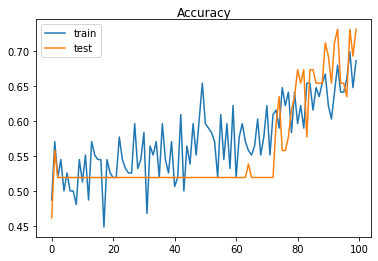

In [34]:
# plot accuracy learning curves

plt.title('Accuracy', pad=-40)
plt.plot(historyd.history['accuracy'], label='train')
plt.plot(historyd.history['val_accuracy'], label='test')
plt.legend()
plt.show()


Podemos ver que, usando o teste da camada de eliminação (Dropout), a precisão aumentou de $0.71$ para $0.75$